<a href="https://colab.research.google.com/github/slee04/SQL_workshop/blob/master/DeepLearning_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing Packages

In [0]:
#!pip install tensorflow==2.0.0

In [0]:
#!pip install keras
#!pip install scikit-learn
#!pip install numpy
#!pip install pandas

In [0]:
import pandas as pd
import numpy as np
import random

In [0]:
pd.__version__

# Creating Random Data

In [0]:
random.seed(6)
# data
num_of_features = 5

num_of_samples = 3000
x = pd.DataFrame(np.random.randn(num_of_samples, num_of_features),
                 columns=['cont_'+str(s) for s in list(range(0, num_of_features))])

# labels
y = pd.DataFrame(1*(x.sum(axis = 1) > 2.5), columns=['target1'])

# Normalizing the data

In [20]:
x = (x-x.min())/(x.max()-x.min())
x

,cont_0,cont_1,cont_2,cont_3,cont_4
0,0.476387,0.613241,0.719182,0.321695,0.644063
1,0.442547,0.617408,0.589897,0.542201,0.551628
2,0.489162,0.446611,0.243150,0.588134,0.570958
3,0.545528,0.456239,0.707864,0.609273,0.432958
4,0.592830,0.588922,0.682919,0.440856,0.554973
...,...,...,...,...,...
2995,0.467400,0.525970,0.803308,0.398164,0.384511
2996,0.418555,0.603243,0.449417,0.784204,0.465480
2997,0.521748,0.426206,0.609192,0.499098,0.427439
2998,0.181830,0.308113,0.310202,0.461317,0.385041


If you want to read a csv file from your machine,

In [0]:
from google.colab import files
file = files.upload()
d = pd.read_csv()

In [23]:
x.describe()

,cont_0,cont_1,cont_2,cont_3,cont_4
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.482854,0.497562,0.544765,0.472327,0.505526
std,0.140280,0.158058,0.143301,0.129160,0.134396
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.385476,0.392007,0.447561,0.387616,0.416392
50%,0.484414,0.496606,0.542022,0.472286,0.502288
75%,0.574929,0.602862,0.642862,0.555078,0.596230
max,1.000000,1.000000,1.000000,1.000000,1.000000


# Splitting the Data into Training and Test Parts

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=55)

# Creating The Deep Neural Network

In [28]:
import tensorflow as tf
print('Tensorflow version: ', tf.__version__)

Tensorflow version:  2.0.0


In [0]:
# Model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dropout, Dense

feat_num = len(x.columns)
targets_num = len(y.columns)
input = Input(shape=(feat_num,))

xx = Dense(10, activation='relu', name = 'first_layer')(input)
xx = Dropout(0.3)(xx)

preds = Dense(targets_num, activation='sigmoid', name = 'output_layer')(xx)
model = Model(inputs=input, outputs=preds)

model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

# Architecture of the model

In [43]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 5)]               0         
_________________________________________________________________
first_layer (Dense)          (None, 10)                60        
_________________________________________________________________
dropout_8 (Dropout)          (None, 10)                0         
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 71
Trainable params: 71
Non-trainable params: 0
_________________________________________________________________


# Fitting the model

In [0]:
!pip install livelossplot

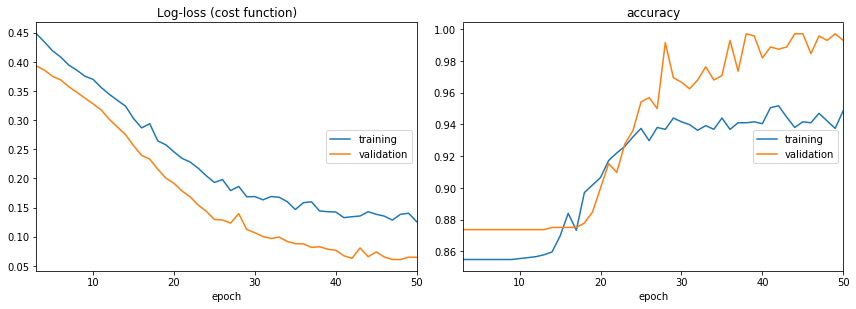

Log-loss (cost function):
training   (min:    0.126, max:    0.493, cur:    0.126)
validation (min:    0.061, max:    0.407, cur:    0.065)

accuracy:
training   (min:    0.832, max:    0.952, cur:    0.949)
validation (min:    0.874, max:    0.997, cur:    0.993)
1680/1680 [==============================] - 4s 2ms/sample - loss: 0.1258 - accuracy: 0.9488 - val_loss: 0.0647 - val_accuracy: 0.9931


In [50]:
from livelossplot.keras import PlotLossesCallback as p
model.fit(x_train, y_train, batch_size=1, epochs =50,
          validation_split = 0.3, callbacks=[p()])

#Evaluating the model on test data

In [51]:
model.evaluate(x_test, y_test) # Loss & accuracy

600/600 [==============================] - 0s 38us/sample - loss: 0.0703 - accuracy: 0.9917


[0.07026920005679131, 0.9916667]

# Prediction

In [52]:
y_pred = model.predict(x_test)

In [53]:
y_pred

array([[6.80366874e-01],
       [2.75596976e-03],
       [8.93544078e-01],
       [2.94536352e-04],
       [2.53319740e-06],
       [3.63588333e-06],
       [6.40977144e-01],
       [0.00000000e+00],
       [2.51553386e-01],
       [9.20891762e-06],
       [1.39423609e-02],
       [1.90161169e-02],
       [4.70703840e-03],
       [2.22899884e-01],
       [5.53727150e-05],
       [1.49887800e-03],
       [5.85284829e-03],
       [2.86741853e-02],
       [6.18632376e-01],
       [2.10145354e-01],
       [1.59144402e-05],
       [6.25014305e-04],
       [1.69605017e-04],
       [3.87430191e-06],
       [1.09043717e-03],
       [2.91993141e-01],
       [9.42349434e-05],
       [9.74103808e-03],
       [7.74860382e-07],
       [8.30465734e-01],
       [7.49528408e-04],
       [1.78813934e-07],
       [2.74389982e-04],
       [5.21811843e-03],
       [1.67879462e-03],
       [6.52611256e-04],
       [5.18709421e-04],
       [2.75349855e-01],
       [1.84774399e-06],
       [9.53674316e-06],
